# k- Nearest Neighbors Algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

### KNN Classification on Wine Quality Dataset

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [82]:
wine_ds = pd.read_csv(r"C:\Users\potla\ML_LAB\DataSets\winequality.csv")

In [83]:
wine_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [84]:
wine_ds= wine_ds[wine_ds['type']=="red"]

In [85]:
wine_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
len(wine_ds)

1599

In [87]:
wine_ds.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [88]:
wine_ds = wine_ds.drop(['type'], axis=1)

In [89]:
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [91]:
wine_ds.isnull().sum().sum()

8

In [92]:
for i in wine_ds.columns:
    print("The no of null values in column", i, " are " , wine_ds[i].isnull().sum())

The no of null values in column fixed acidity  are  2
The no of null values in column volatile acidity  are  1
The no of null values in column citric acid  are  1
The no of null values in column residual sugar  are  0
The no of null values in column chlorides  are  0
The no of null values in column free sulfur dioxide  are  0
The no of null values in column total sulfur dioxide  are  0
The no of null values in column density  are  0
The no of null values in column pH  are  2
The no of null values in column sulphates  are  2
The no of null values in column alcohol  are  0
The no of null values in column quality  are  0


In [93]:
for i in wine_ds.columns:
    if wine_ds[i].isnull().sum()>0:
        wine_ds[i].fillna(wine_ds[i].mean(),inplace=True)

In [94]:
for i in wine_ds.columns:
    print("The no of null values in column", i, " are " , wine_ds[i].isnull().sum())

The no of null values in column fixed acidity  are  0
The no of null values in column volatile acidity  are  0
The no of null values in column citric acid  are  0
The no of null values in column residual sugar  are  0
The no of null values in column chlorides  are  0
The no of null values in column free sulfur dioxide  are  0
The no of null values in column total sulfur dioxide  are  0
The no of null values in column density  are  0
The no of null values in column pH  are  0
The no of null values in column sulphates  are  0
The no of null values in column alcohol  are  0
The no of null values in column quality  are  0


In [95]:
print("The total null values are : " , wine_ds.isnull().sum().sum())

The total null values are :  0


In [96]:
wine_ds['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [97]:
wine_ds['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [98]:
corr= wine_ds.corr()

In [99]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255598,0.670719,0.114870,0.093350,-0.154546,-0.114259,0.667650,-0.682458,0.183874,-0.061376,0.123803
volatile acidity,-0.255598,1.000000,-0.553006,0.001931,0.061499,-0.011307,0.075703,0.022669,0.234451,-0.261441,-0.203354,-0.390833
citric acid,0.670719,-0.553006,1.000000,0.143393,0.203790,-0.059088,0.035781,0.364639,-0.541024,0.314302,0.110769,0.226903
residual sugar,0.114870,0.001931,0.143393,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085871,0.005576,0.042075,0.013732
chlorides,0.093350,0.061499,0.203790,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264967,0.371473,-0.221141,-0.128907
free sulfur dioxide,-0.154546,-0.011307,-0.059088,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071079,0.050839,-0.069408,-0.050656
total sulfur dioxide,-0.114259,0.075703,0.035781,0.203028,0.047400,0.667666,1.000000,0.071269,-0.065536,0.042921,-0.205654,-0.185100
density,0.667650,0.022669,0.364639,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341315,0.148847,-0.496180,-0.174919
pH,-0.682458,0.234451,-0.541024,-0.085871,-0.264967,0.071079,-0.065536,-0.341315,1.000000,-0.197577,0.205772,-0.057079
sulphates,0.183874,-0.261441,0.314302,0.005576,0.371473,0.050839,0.042921,0.148847,-0.197577,1.000000,0.093307,0.251345


Generating  Heat Map

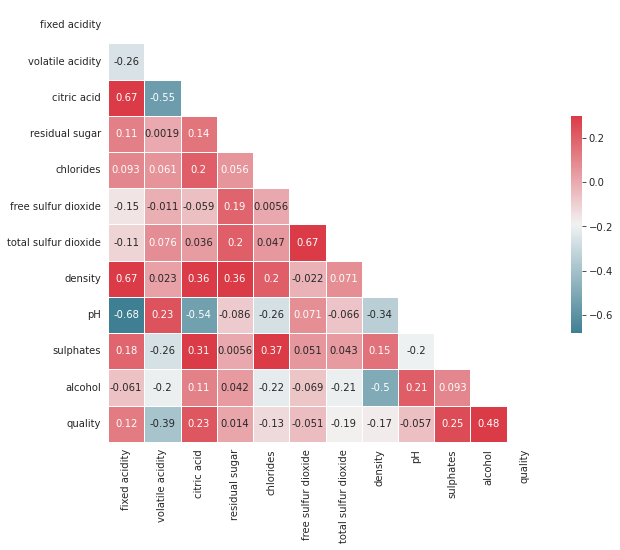

In [100]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Since the impact of Residual Sugar , Free sulfur dioxide and pH is very less on Quality, we can drop those columns

In [101]:
wine_ds.drop(["residual sugar",'free sulfur dioxide','pH'],axis = 1,inplace = True)
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
4898,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
4899,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
4900,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
4901,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4902,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [102]:
min(wine_ds['alcohol'])


8.4

In [103]:
max(wine_ds['alcohol'])

14.9

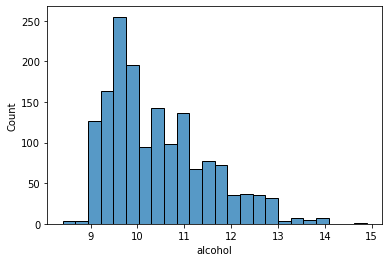

In [104]:
sns.histplot(wine_ds['alcohol'])
plt.show()

In [105]:
bins = [0, 10, 12, 15]
labels = ["low","median","high"]
wine_ds['alcohol_label'] = pd.cut(wine_ds['alcohol'], bins=bins, labels=labels)
wine_ds.drop('alcohol',axis =1, inplace = True)
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality,alcohol_label
4898,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low
4899,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,5,low
4900,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,5,low
4901,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,6,low
4902,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,5,low


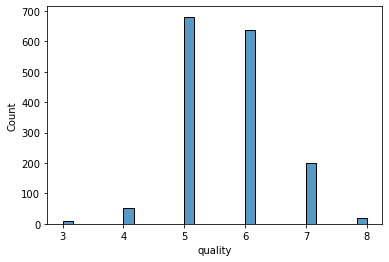

In [106]:
sns.histplot(wine_ds['quality'])
plt.show()

In [107]:
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
wine_ds['quality_label'] = pd.cut(wine_ds['quality'], bins=bins, labels=labels)
wine_ds.drop('quality',axis =1, inplace = True)


In [108]:
wine_ds.tail()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol_label,quality_label
6492,6.2,0.600,0.08,0.090,44.0,0.99490,0.580000,median,normal
6493,5.9,0.550,0.10,0.062,51.0,0.99512,0.658078,median,normal
6494,6.3,0.510,0.13,0.076,40.0,0.99574,0.750000,median,normal
6495,5.9,0.645,0.12,0.075,44.0,0.99547,0.710000,median,normal
6496,6.0,0.310,0.47,0.067,42.0,0.99549,0.660000,median,normal


In [109]:
# Convert category values to numeric values by creating dummy featutes.
df_wine = pd.get_dummies(wine_ds, columns=['alcohol_label'], drop_first=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality_label,alcohol_label_median,alcohol_label_high
4898,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0
4899,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,normal,0,0
4900,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,normal,0,0
4901,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,normal,0,0
4902,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0


In [110]:
result = df_wine['quality_label']
df_wine.drop(['quality_label'], axis=1, inplace=True)
print(df_wine.shape, result.shape)

(1599, 9) (1599,)


In [111]:
result

4898    normal
4899    normal
4900    normal
4901    normal
4902    normal
         ...  
6492    normal
6493    normal
6494    normal
6495    normal
6496    normal
Name: quality_label, Length: 1599, dtype: category
Categories (3, object): ['poor' < 'normal' < 'excellent']

In [112]:
from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.neighbors import KNeighborsClassifier # KNN Model
from sklearn import metrics

In [113]:
scaler = StandardScaler()
scaler.fit(df_wine)
scaled_features = scaler.transform(df_wine)
df_wine_sc = pd.DataFrame(scaled_features, columns=df_wine.columns)

In [114]:
df_wine_sc.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol_label_median',
       'alcohol_label_high'],
      dtype='object')

In [115]:
# use 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(df_wine_sc, result, test_size=0.30, random_state=11)

In [116]:
# convert dataframe to nd numpy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [121]:
def apply_knn(neigh, weight='uniform'):
    knn = KNeighborsClassifier(n_neighbors=neigh, weights=weight)
    knn.fit(X_train,y_train)
    pred_knn = knn.predict(X_test)
    return pred_knn

In [124]:
pred_knn_for_20 = apply_knn(20)
print('Accuracy of model at K=20 is', round(metrics.accuracy_score(y_test, pred_knn_for_20),2)*100, "%")

Accuracy of model at K=20 is 82.0 %
